## Observations and Insights 

In [200]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
# Add NumPy
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
all_data = pd.merge(mouse_metadata,study_results, on="Mouse ID")
# Display the data table for preview
all_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [201]:
# Checking the number of mice.
mice_count = all_data["Mouse ID"].unique()
print(len(mice_count))

249


In [202]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Code idea learned from https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/
duplicates = all_data[all_data.duplicated(["Mouse ID","Timepoint"])]


In [203]:
# Optional: Get all the data for the duplicate mouse ID. 
# Displays the duplicate row (the first unique row not in this set of data)
duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [204]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Duplicate mouse is g989
# Filter all_data for Mouse IDs not equal to g989
clean_data = all_data[all_data["Mouse ID"] != "g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [205]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_data["Mouse ID"].unique()

print(len(clean_mice_count))

248


## Summary Statistics

In [206]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# Created single variable grouping by Drug Regimen to perform stats on Tumor Volume. 
cd_var = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
groupbytable = pd.DataFrame({"Mean":cd_var.mean(),
                            "Median":cd_var.median(),
                            "Variance":cd_var.var(),
                            "Std. Deviation":cd_var.std(),
                            "SEM":cd_var.sem(),})
groupbytable


,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [207]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean', 'median', 'var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

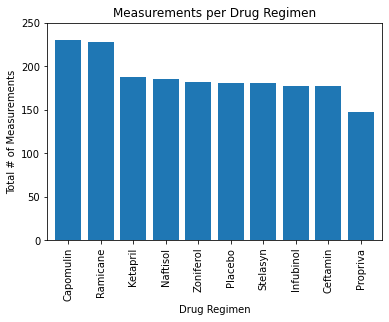

In [239]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_count = clean_data["Drug Regimen"].value_counts()
pandasbar = drug_count.plot(kind="bar", xlim = (-.75, len(drug_count)-.25), ylim = (0,250), width = .8)
pandasbar.set_xlabel("Drug Regimen")
pandasbar.set_ylabel("Total # of Measurements")
pandasbar.set_title("Measurements per Drug Regimen")

plt.show()

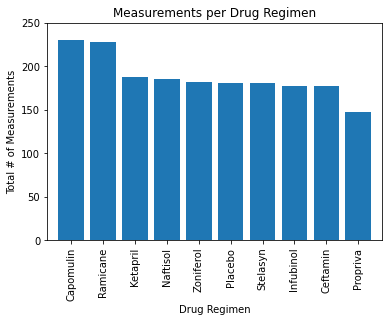

In [241]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Get names of each Drug Regimen
d_names = clean_data["Drug Regimen"].value_counts().index
# After struggling to use this list, checked for type
type(d_names)
# Noting it is a numpy array, convert to list to use names for X-Ticks
drug_names = d_names.tolist()
d_count = drug_count.tolist()
# Create array the length of the amount of Drug Regimens 
x_axis = np.arange(0,len(drug_names))
# Create Bar Plot
plt.bar(x_axis,d_count, width = .8)
# Create list of numbers based on the number of Drug Regimens
tic_loc = [val for val in x_axis]
# Replace Drug Regimen number with name, rotate to show vertically for visual appeal
plt.xticks(tic_loc , drug_names, rotation="vertical")
# Label axes/chart
plt.xlabel("Drug Regimen")
plt.ylabel("Total # of Measurements")
plt.title("Measurements per Drug Regimen")
# Set limits on chart
plt.xlim(-.75, len(x_axis)-.25)
plt.ylim(0,250)
# Show chart
plt.show()

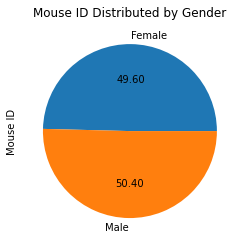

In [210]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_data.groupby("Sex")["Mouse ID"].nunique()
# Would like to replace autopct with number of Mice if possible... 
genderpie = gender.plot(kind = "pie", autopct='%.2f')
genderpie.set_title("Mouse ID Distributed by Gender")

plt.show()


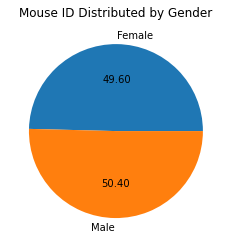

In [211]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x_axis = ["Female", "Male"]
plt.pie(gender, labels = x_axis,autopct='%.2f')
plt.title("Mouse ID Distributed by Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [212]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lasttime = clean_data.groupby("Mouse ID")["Timepoint"].max()
lasttime

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_clean = pd.merge(clean_data, lasttime,  on = "Mouse ID", how = "left")
new_clean = new_clean.rename(columns={"Timepoint_x":"Timepoint", "Timepoint_y":"Max Timepoint"})
max_only = new_clean.loc[(new_clean["Timepoint"]==new_clean["Max Timepoint"])]
max_only = max_only.reset_index(drop=True)
max_only = max_only.drop(columns={"Max Timepoint"})
max_only


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [227]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capvol = []
ramvol = []
infvol = []
cefvol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in max_only.index:
    if max_only["Drug Regimen"][x] == treatments[0]: 
        capvol.append(max_only["Tumor Volume (mm3)"][x])
    if max_only["Drug Regimen"][x] == treatments[1]:
        ramvol.append(max_only["Tumor Volume (mm3)"][x])
    if max_only["Drug Regimen"][x] == treatments[2]:
        infvol.append(max_only["Tumor Volume (mm3)"][x])
    if max_only["Drug Regimen"][x] == treatments[3]:
        cefvol.append(max_only["Tumor Volume (mm3)"][x])
    
    # add subset 
allvol = [capvol, ramvol, infvol, cefvol]
# add lists to DataFrame
tumvol = pd.DataFrame ({"Capomulin":capvol,
                       "Ramicane":ramvol,
                       "Infubinol":infvol,
                       "Ceftamin":cefvol})
     # Determine outliers using upper and lower bounds
quartiles = tumvol.quantile([.25,.5,.75])
lowerq = quartiles.iloc[0,:]
upperq = quartiles.iloc[2,:]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
# Code idea to count outliers came from Stack Overflow (https://stackoverflow.com/questions/39068214/how-to-count-outliers-for-all-columns-in-python)
outliers = ((tumvol < lower_bound) | (tumvol > upper_bound)).sum()
nl = '\n'
print(f"Here are the number of outliers by Drug Regimen:{nl}{nl}{outliers}")
# print(f"Values above the following could be outliers: {upper_bound}")

    

Here are the number of outliers by Drug Regimen:

Capomulin    0
Ramicane     0
Infubinol    1
Ceftamin     0
dtype: int64


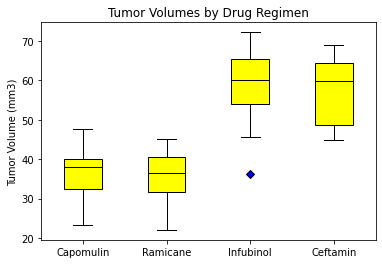

In [214]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
blue_diamond = dict(markerfacecolor='b', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(allvol, labels = treatments, flierprops=blue_diamond, patch_artist = True, boxprops=dict(facecolor= "yellow", color="black"), capprops = dict(color = "black"), medianprops = dict(color = "black"))
plt.show()



## Line and Scatter Plots

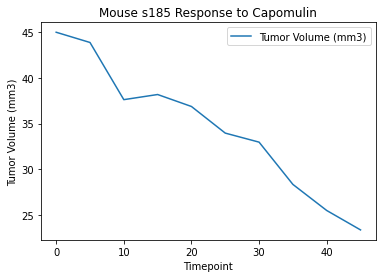

In [215]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_groups = clean_data.groupby(['Mouse ID', 'Timepoint']).sum()
cap_mouse = "s185"
just_one_mouse = line_groups.loc[cap_mouse]
mouse_line = just_one_mouse.plot(kind="line", y='Tumor Volume (mm3)', title="Mouse s185 Response to Capomulin")
mouse_line.set_ylabel("Tumor Volume (mm3)")
plt.show()

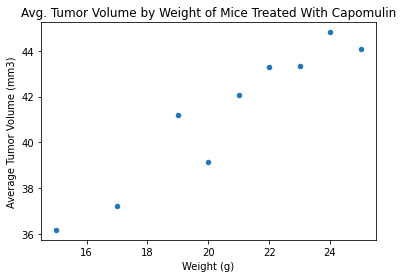

In [216]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scat_groups =  clean_data.groupby(['Drug Regimen','Weight (g)']).mean()
scat_reg = scat_groups.loc["Capomulin"]
scat_reg = scat_reg.reset_index()
scat_plot = scat_reg.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", title="Avg. Tumor Volume by Weight of Mice Treated With Capomulin")
scat_plot.set_ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.95


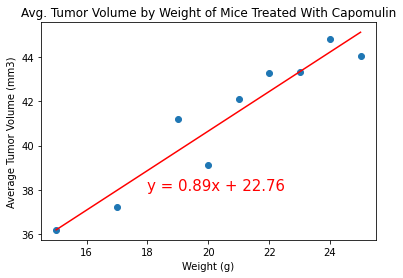

In [221]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cap_weight = scat_reg["Weight (g)"]
cap_vol = scat_reg["Tumor Volume (mm3)"]
correlation = st.pearsonr(cap_weight,cap_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_weight,cap_vol)
regress_values = cap_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(cap_weight,cap_vol)
plt.plot(cap_weight,regress_values,"r-")
plt.annotate(line_eq,(18,38),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Avg. Tumor Volume by Weight of Mice Treated With Capomulin")
plt.show()